<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# Additional imports

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Build the dataset

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # Short distance
  # y = gee_label(x, 0, 1, 2) # Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Linear model
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'], 
)

# Train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 1s 5ms/step - loss: 0.8240 - accuracy: 0.4808 - val_loss: 0.7092 - val_accuracy: 0.4944
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.4968 - val_loss: 0.6960 - val_accuracy: 0.4968
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5256 - val_loss: 0.6973 - val_accuracy: 0.4940
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5232 - val_loss: 0.6973 - val_accuracy: 0.5164
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5256 - val_loss: 0.6973 - val_accuracy: 0.5120
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5204 - val_loss: 0.6983 - val_accuracy: 0.5100
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5196 - val_loss: 0.6976 - val_accuracy: 0.5140
Epoch 8/100
79/79 [======

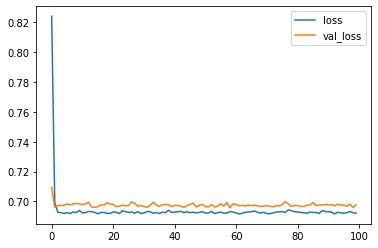

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

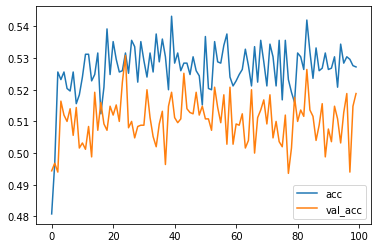

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Simple RNN
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# Method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 12ms/step - loss: 0.7186 - accuracy: 0.4972 - val_loss: 0.6865 - val_accuracy: 0.5588
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6602 - accuracy: 0.5964 - val_loss: 0.6411 - val_accuracy: 0.6308
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5994 - accuracy: 0.7044 - val_loss: 0.5715 - val_accuracy: 0.7148
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5370 - accuracy: 0.7608 - val_loss: 0.5050 - val_accuracy: 0.7668
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.4583 - accuracy: 0.8084 - val_loss: 0.4123 - val_accuracy: 0.8396
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3707 - accuracy: 0.8644 - val_loss: 0.3351 - val_accuracy: 0.8788
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3108 - accuracy: 0.8892 - val_loss: 0.2926 - val_accuracy: 0.8956
Epoch 8/200
79/79 

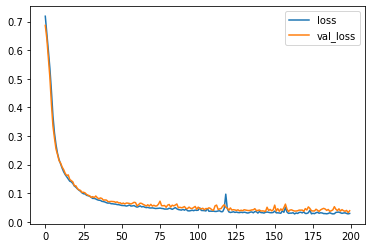

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

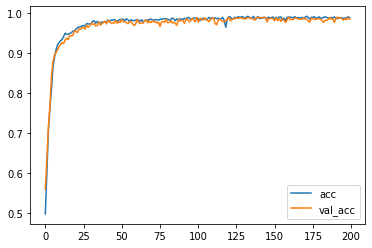

In [9]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# Change to the long distance problem
# Start with a small T and increase it later
T = 10
D = 1 
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [11]:
#  Test simpile RNN again
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 14ms/step - loss: 0.7033 - accuracy: 0.5104 - val_loss: 0.7015 - val_accuracy: 0.5052
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6958 - accuracy: 0.5112 - val_loss: 0.6945 - val_accuracy: 0.5060
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6890 - accuracy: 0.5360 - val_loss: 0.6804 - val_accuracy: 0.5616
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6484 - accuracy: 0.6392 - val_loss: 0.6746 - val_accuracy: 0.6180
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6375 - accuracy: 0.6692 - val_loss: 0.6037 - val_accuracy: 0.6980
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5917 - accuracy: 0.7120 - val_loss: 0.5598 - val_accuracy: 0.7444
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5609 - accuracy: 0.7440 - val_loss: 0.5209 - val_accuracy: 0.7728
Epoch 8/200
79/79 

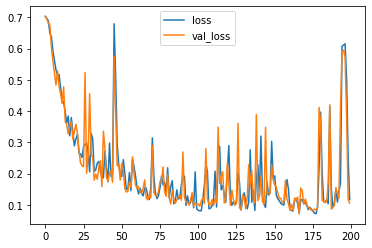

In [12]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

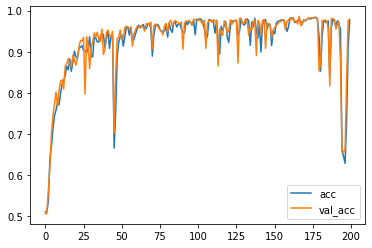

In [13]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
#  Test LSTM
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 3s 10ms/step - loss: 0.6951 - accuracy: 0.4940 - val_loss: 0.6939 - val_accuracy: 0.4904
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4876 - val_loss: 0.6928 - val_accuracy: 0.5092
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4988 - val_loss: 0.6926 - val_accuracy: 0.5120
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4940 - val_loss: 0.6925 - val_accuracy: 0.5072
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6945 - val_accuracy: 0.4896
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4948 - val_loss: 0.6938 - val_accuracy: 0.4900
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5076 - val_loss: 0.6940 - val_accuracy: 0.4956
Epoch 8/200
79/79 [=====

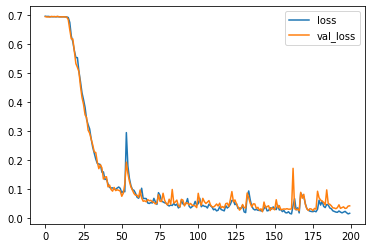

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

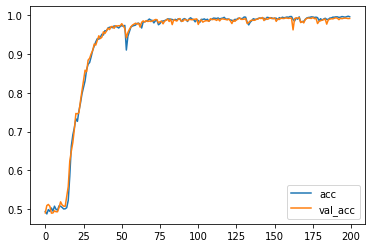

In [16]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# Make the problem harder by making T larger

T = 20
D = 1 
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [18]:
#  Test simpile RNN again
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 17ms/step - loss: 0.6968 - accuracy: 0.5064 - val_loss: 0.6976 - val_accuracy: 0.5088
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6957 - accuracy: 0.5056 - val_loss: 0.6963 - val_accuracy: 0.4996
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6949 - accuracy: 0.4892 - val_loss: 0.6944 - val_accuracy: 0.5028
Epoch 4/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6943 - accuracy: 0.5080 - val_loss: 0.6942 - val_accuracy: 0.4964
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6934 - accuracy: 0.5064 - val_loss: 0.6954 - val_accuracy: 0.4964
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6928 - accuracy: 0.5216 - val_loss: 0.6968 - val_accuracy: 0.4996
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6944 - accuracy: 0.5212 - val_loss: 0.6963 - val_accuracy: 0.4892
Epoch 8/200
79/79 

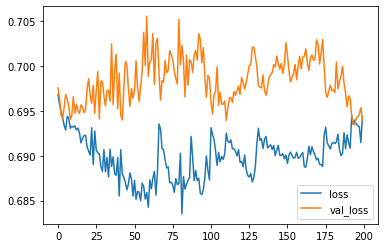

In [19]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

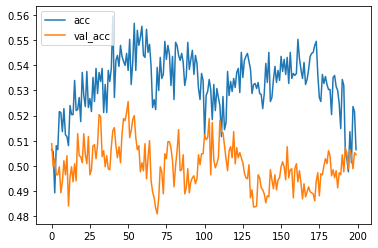

In [20]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [21]:
#  Test LSTM again
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 11ms/step - loss: 0.6945 - accuracy: 0.4940 - val_loss: 0.6927 - val_accuracy: 0.5200
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4992 - val_loss: 0.6928 - val_accuracy: 0.5044
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4960 - val_loss: 0.6927 - val_accuracy: 0.5216
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4924 - val_loss: 0.6927 - val_accuracy: 0.5152
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6927 - val_accuracy: 0.5236
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6930 - val_accuracy: 0.5036
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 8/200
79/79 [=====

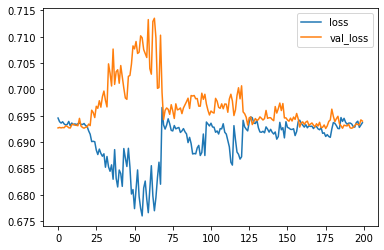

In [22]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

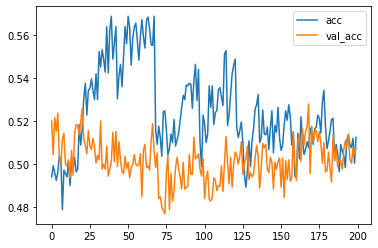

In [23]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [24]:
#  Test GRU
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 10ms/step - loss: 0.6964 - accuracy: 0.4956 - val_loss: 0.6940 - val_accuracy: 0.4952
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4924 - val_loss: 0.6933 - val_accuracy: 0.4984
Epoch 3/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4944 - val_loss: 0.6929 - val_accuracy: 0.5188
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4964 - val_loss: 0.6927 - val_accuracy: 0.5184
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.4948 - val_loss: 0.6936 - val_accuracy: 0.4948
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4948
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4944 - val_loss: 0.6929 - val_accuracy: 0.5168
Epoch 8/400
79/79 [=====

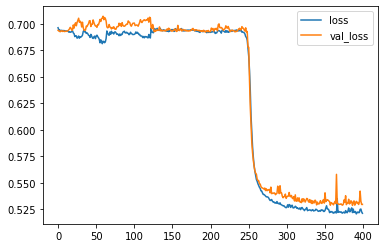

In [25]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

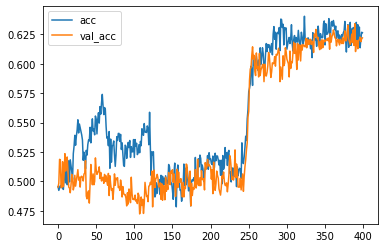

In [26]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [27]:
# Make the problem harder by making T larger

T = 30
D = 1 
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [28]:
#  Test LSTM again
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 11ms/step - loss: 0.6945 - accuracy: 0.4968 - val_loss: 0.6934 - val_accuracy: 0.4932
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4964 - val_loss: 0.6933 - val_accuracy: 0.4936
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4968 - val_loss: 0.6936 - val_accuracy: 0.4976
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5080 - val_loss: 0.6934 - val_accuracy: 0.4976
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4912 - val_loss: 0.6936 - val_accuracy: 0.4976
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6940 - val_accuracy: 0.4976
Epoch 8/400
79/79 [=====

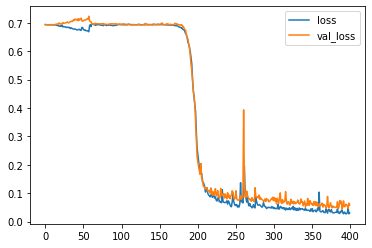

In [29]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

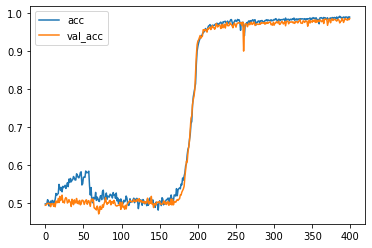

In [30]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [31]:
#  Test LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# Make the RNN
i = Input(shape=(T, D))

# Method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 3s 11ms/step - loss: 0.6945 - accuracy: 0.4924 - val_loss: 0.6936 - val_accuracy: 0.4936
Epoch 2/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6998 - val_accuracy: 0.4976
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5148 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5108 - val_loss: 0.6936 - val_accuracy: 0.5036
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5116 - val_loss: 0.6939 - val_accuracy: 0.4988
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5268 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 8/100
79/79 [=====

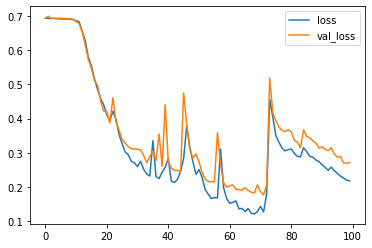

In [32]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

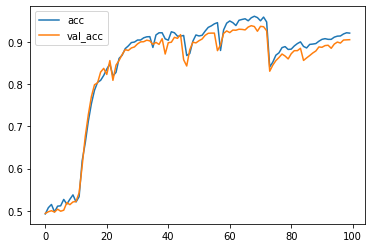

In [33]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()